In [1]:
# if no high pass IKappa
from LIMxCMBL.init import *
from  LIMxCMBL.kernels import *
f_KLIM   = get_f_KI()

In [2]:
import matplotlib.pyplot as plt

# Generate the worst pencil beam ever

In [3]:
chis = np.linspace(0, chimax_sample, 2**12)

In [4]:
np.log10(2*np.pi / chimax_sample)

-3.241974465887123

In [5]:
sigma = 1
l = 50

X1, X2 = np.meshgrid(chis, chis)
sq_dist = (X1 - X2)**2
K = sigma**2 * np.exp(-sq_dist / (2 * l**2))

In [6]:
LIM = f_KLIM(chis) * np.random.multivariate_normal(mean = np.zeros_like(chis), cov  = K, size = 1)[0]

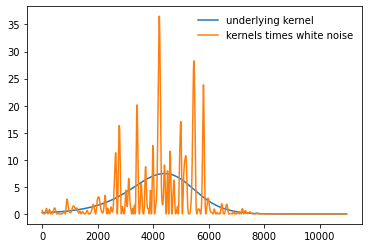

In [7]:
plt.plot(chis, f_KLIM(chis)**2, label='underlying kernel')
plt.plot(chis, LIM**2, label = 'kernels times white noise')
plt.legend(frameon = False)

# Manually high pass filter it

In [8]:
LIM_k = np.fft.rfft(LIM)
k = 2*np.pi*np.fft.rfftfreq(len(LIM), d = np.mean(np.diff(chis)))

[]

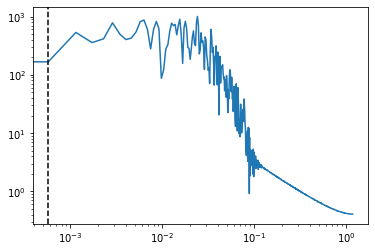

In [9]:
plt.plot(k, np.abs(LIM_k))
plt.axvline(2*np.pi / chimax_sample, c='k', ls='--')
plt.loglog()

In [10]:
Lambdas = [1e-4, 1e-3, 1e-2, 1e-1]
colors  = dict(zip(Lambdas, plt.cm.rainbow(np.linspace(0, 1, len(Lambdas)))[::-1]))

filterd_LIM_k = np.zeros(shape=(len(Lambdas), len(LIM_k)), dtype = np.complex128)
for i, Lambda in enumerate(Lambdas):
    filterd_LIM_k[i] = np.where(k > Lambda,
                               LIM_k,
                               0.0)

[]

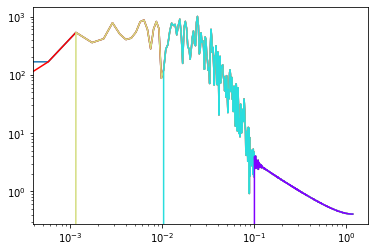

In [11]:
plt.plot(k, np.abs(LIM_k))
for i in range(len(filterd_LIM_k)):
    plt.plot(k, np.abs(filterd_LIM_k[i]), c = colors[Lambdas[i]])
plt.loglog()

In [12]:
filtered_LIM = np.zeros(shape=(len(Lambdas), len(LIM)), dtype = np.float64)
for i in range(len(filterd_LIM_k)):
    filtered_LIM[i] = np.fft.irfft(filterd_LIM_k[i])

# Compare the various high-passed pencil beams

(3000.0, 4000.0)

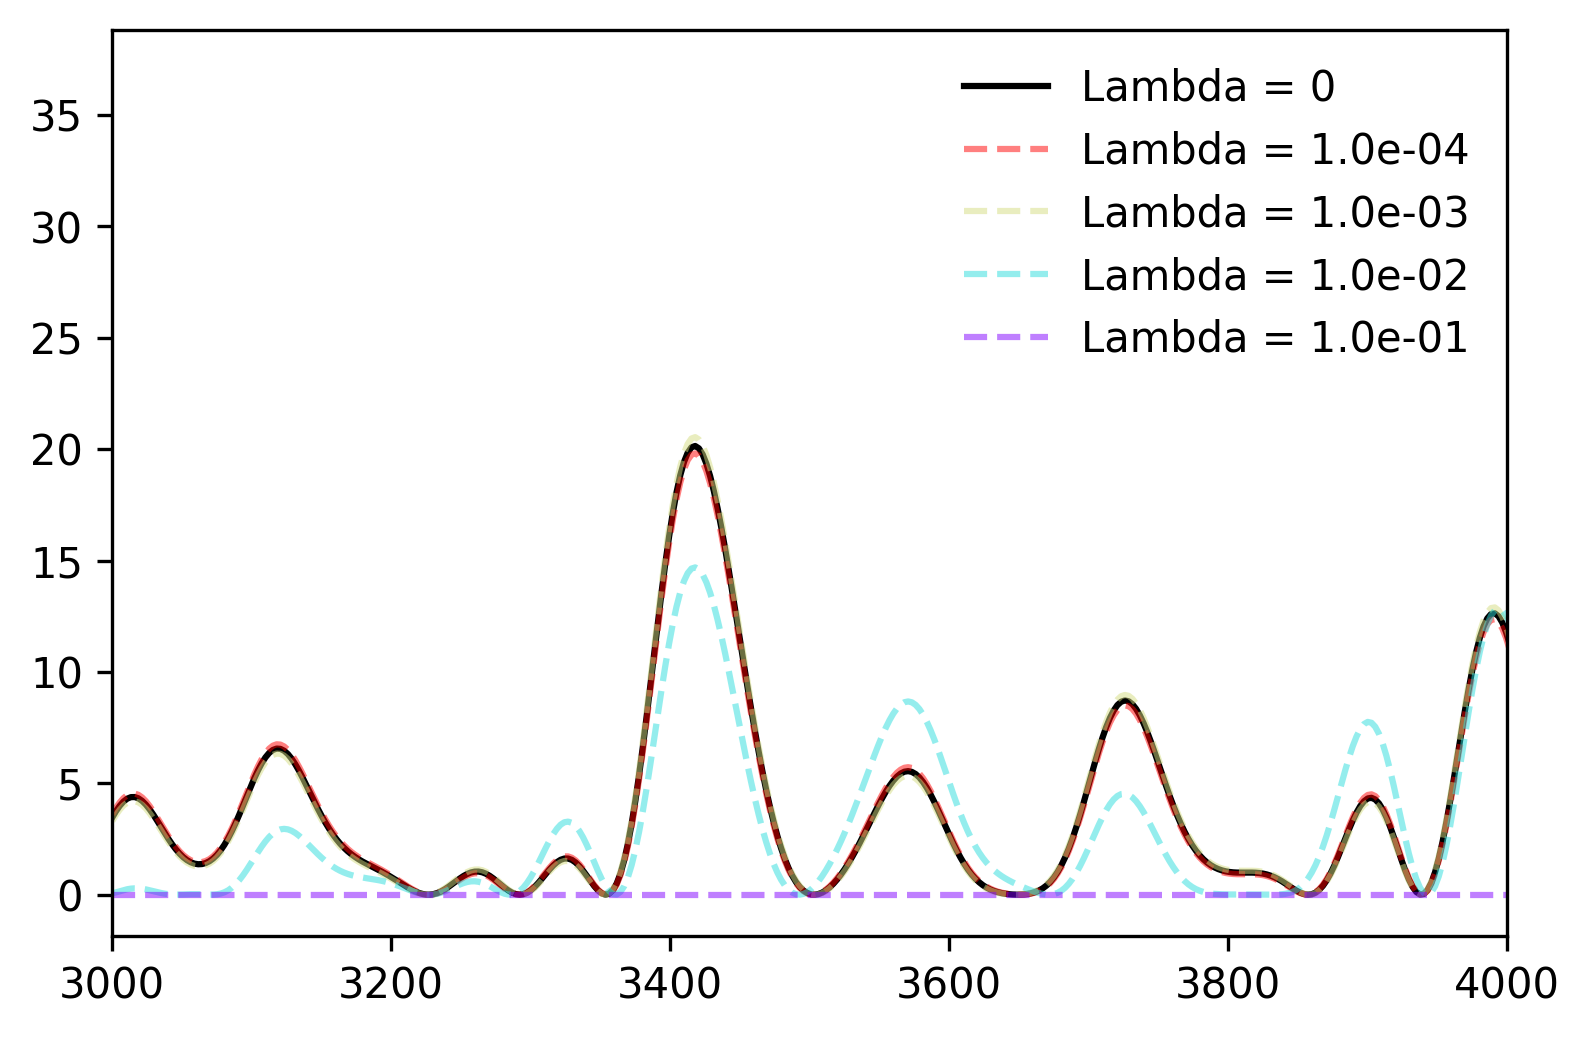

In [13]:
#focusing in on a 100Mpc patch of this
plt.figure(dpi = 300)
plt.plot(chis, LIM**2, label = 'Lambda = 0', c='k')
for i in range(len(filtered_LIM)):
    plt.plot(chis, filtered_LIM[i]**2, 
             label = 'Lambda = %.1e'%(Lambdas[i]), 
             ls = '--', alpha = 0.5,
            c = colors[Lambdas[i]])
plt.legend(frameon = False)
plt.xlim(3000, 4000)

The correlation scale of the density  field is 80Mpc, so if Lambda = 1/(100 Mpc) this shouldn't filter the cosmology out but Lambda = 1/(10 Mpc) does

(3000.0, 4000.0)

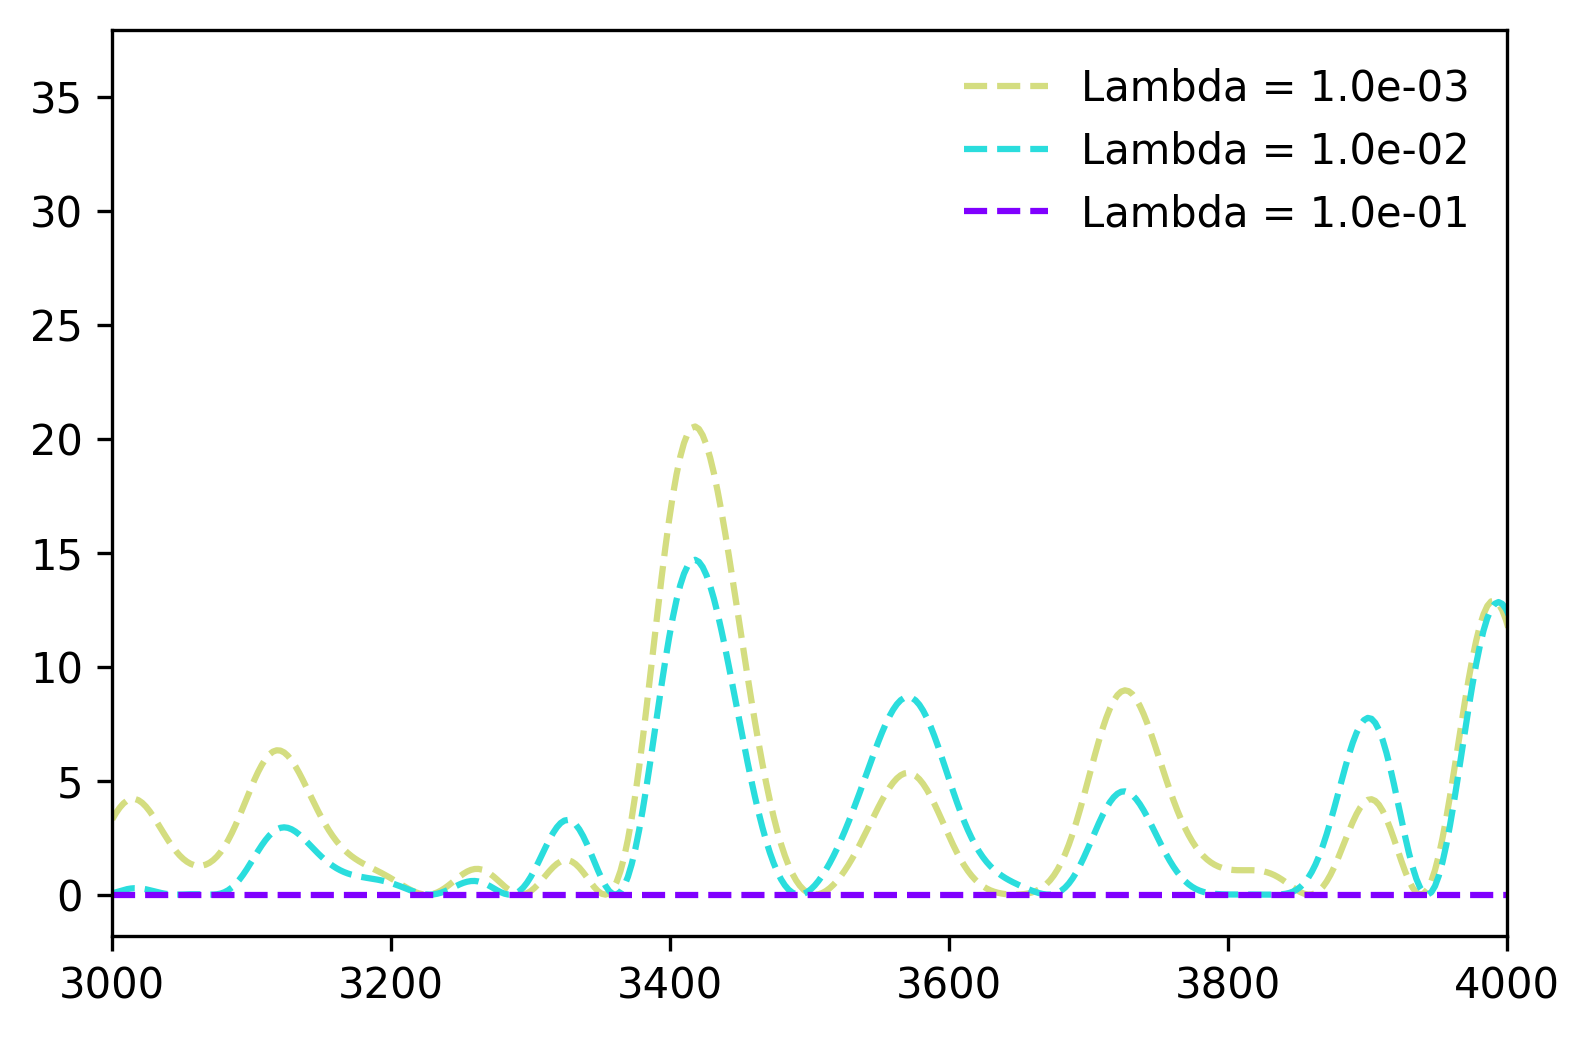

In [19]:
plt.figure(dpi = 300)
for i in range(len(filtered_LIM)):
    if(i<1):
        continue
    plt.plot(chis, filtered_LIM[i]**2, 
             label = 'Lambda = %.1e'%(Lambdas[i]), 
             ls = '--', c = colors[Lambdas[i]])
plt.legend(frameon = False)
plt.xlim(3000, 4000)

# Analytical high-pass filter
Basically convolve with a sinc

In [15]:
x_grid, y_grid = np.meshgrid(chis, chis)

In [41]:
filtered_LIM_theory = np.zeros(shape=(len(Lambdas), len(LIM)), dtype = np.float64)
for i, Lambda in enumerate(Lambdas):
    dx = chis[1] - chis[0]
    sinc_matrix = np.sinc(Lambda*(x_grid - y_grid)/np.pi) * Lambda / np.pi
    filtered_LIM_theory[i] = LIM - dx * np.trapz(LIM[None,:] * sinc_matrix, axis=1)

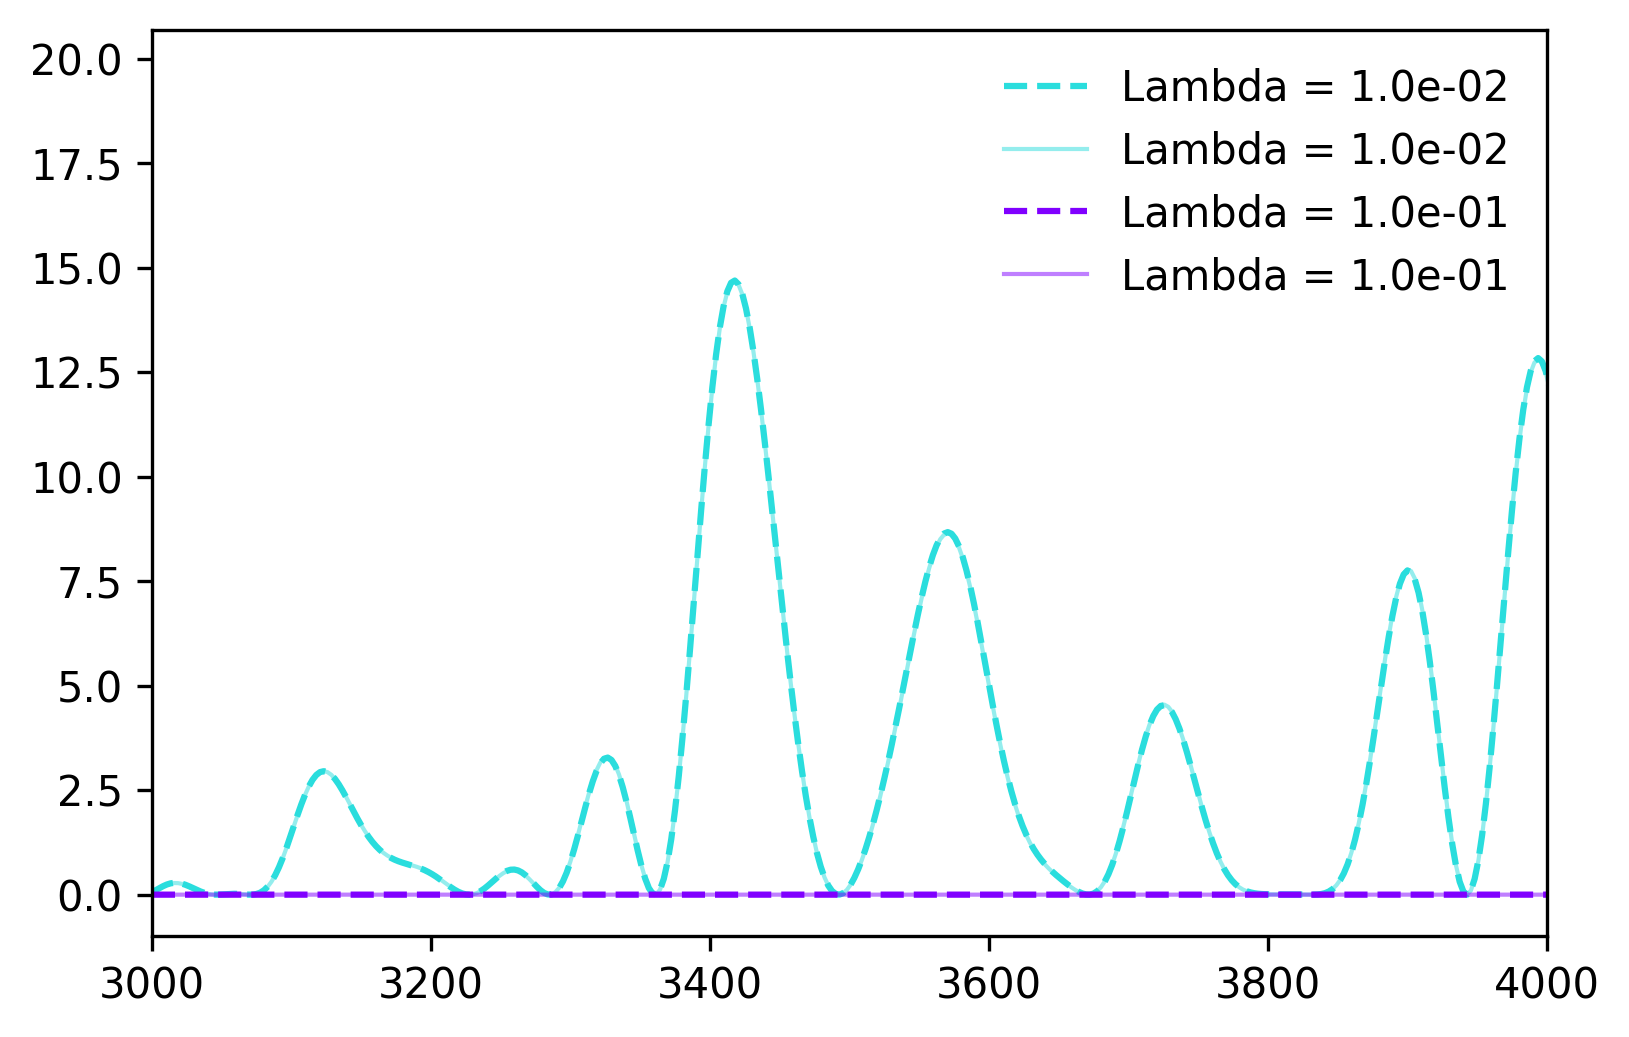

In [42]:
plt.figure(dpi = 300)
for i in range(len(filtered_LIM)):
    if(i<2):
        continue
    L = Lambdas[i]
    plt.plot(chis, filtered_LIM[i]**2, 
             label = 'Lambda = %.1e'%(Lambdas[i]), 
             ls = '--',
            c = colors[L])
    plt.plot(chis, filtered_LIM_theory[i]**2, 
             label = 'Lambda = %.1e'%(Lambdas[i]), 
             lw = 1,
             ls = '-',
             alpha = 0.5,
            c = colors[L])
plt.xlim(3000, 4000)
plt.legend(frameon = False)

# Moral of this notebook, numpy defined sinc not in the way I expected it to